Heart Disease Prediction Using Logistic Regression
World Health Organization has estimated that four out of five cardiovascular disease (CVD) deaths are due to heart attacks. This whole research intends to pinpoint the ratio of patients who possess a good chance of being affected by CVD and also to predict the overall risk using Logistic Regression.

In [140]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [141]:
heart_data=pd.read_csv('framingham.csv')

In [142]:
heart_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Datapreprocessing

In [143]:
heart_data.shape

(4240, 16)

In [144]:
heart_data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [145]:

heart_data.drop(['education'], inplace = True, axis = 1)
heart_data.rename(columns ={'male':'Sex_male'}, inplace = True)


In [146]:
heart_data

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [147]:
heart_data.cigsPerDay.value_counts()

cigsPerDay
0.0     2145
20.0     734
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: count, dtype: int64

In [148]:
heart_data.BPMeds.value_counts()

BPMeds
0.0    4063
1.0     124
Name: count, dtype: int64

In [149]:
heart_data['BPMeds'] = heart_data['BPMeds'].fillna(0.0)

In [150]:
heart_data['totChol']=heart_data['totChol'].fillna(240.0)

In [151]:
heart_data.BMI.value_counts()

BMI
22.91    18
23.48    18
22.54    18
22.19    18
25.09    16
         ..
29.14     1
38.43     1
42.15     1
28.10     1
20.91     1
Name: count, Length: 1364, dtype: int64

In [152]:
heart_data['BMI']=heart_data["BMI"].fillna(22.91)

In [153]:
heart_data

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [154]:
heart_data.isna().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [155]:
heart_data.dropna(inplace=True)

In [156]:
heart_data

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [157]:
heart_data.TenYearCHD.value_counts()

TenYearCHD
0    3235
1     591
Name: count, dtype: int64

Visualization

/var/folders/ds/6kfbb9qd0mx8352l0y59g3tr0000gn/T/ipykernel_73559/2932954436.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data['glucose'] , color='orange')
/Users/sahilsingh/Desktop/AVI-TRAINING/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/ds/6kfbb9qd0mx8352l0y59g3tr0000gn/T/ipykernel_73559/2932954436.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please 

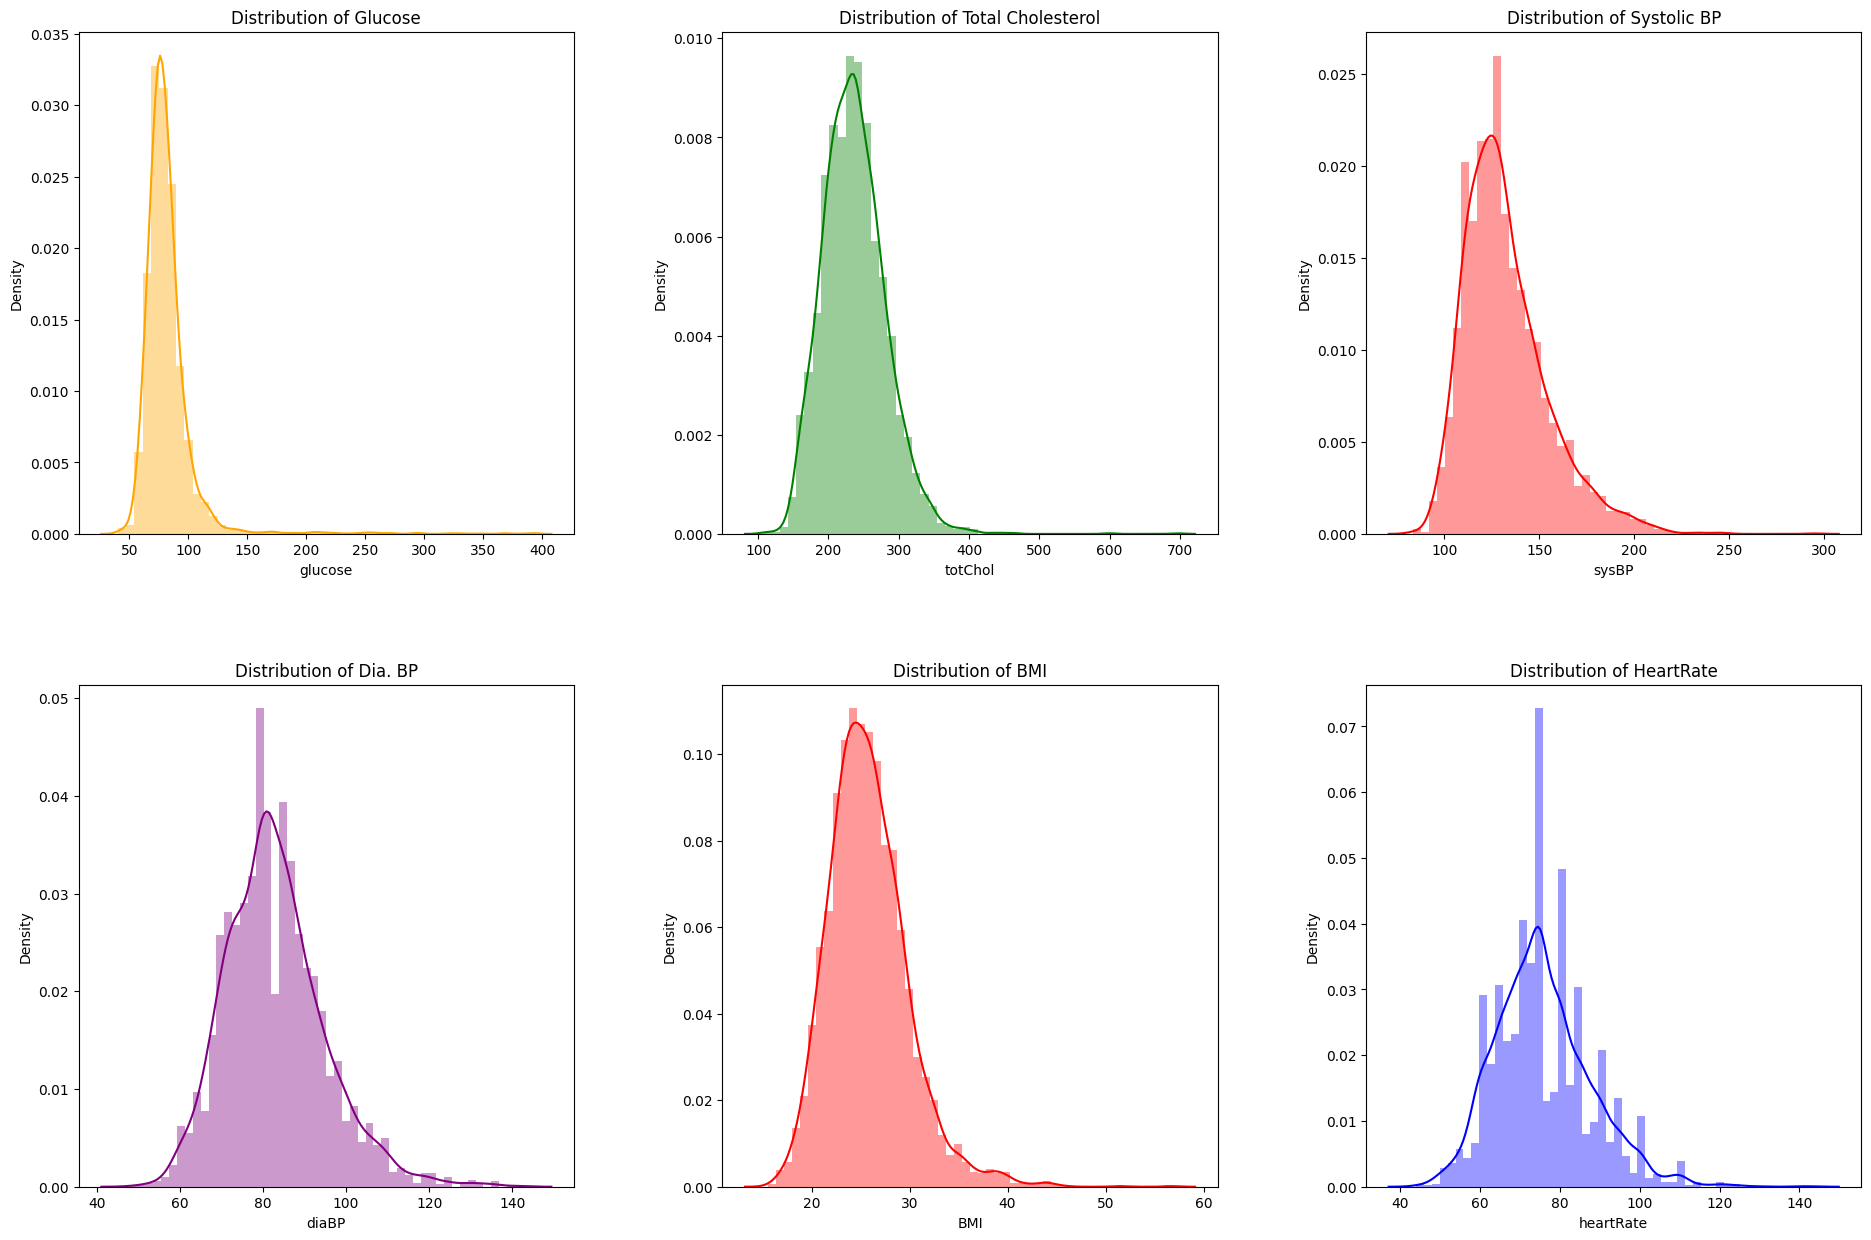

In [202]:
import seaborn as sns
plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.distplot(heart_data['glucose'] , color='orange')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.distplot(heart_data['totChol'], color='g')
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.distplot(heart_data['sysBP'], color='r')
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.distplot(heart_data['diaBP'] , color='purple')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(heart_data['BMI'], color='red')
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.distplot(heart_data['heartRate'], color='blue')
plt.title('Distribution of HeartRate')
plt.show()


/var/folders/ds/6kfbb9qd0mx8352l0y59g3tr0000gn/T/ipykernel_73559/2292318070.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data['age'], bins=15, kde=True, color='purple')
/Users/sahilsingh/Desktop/AVI-TRAINING/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Agewise distribution of the patients')

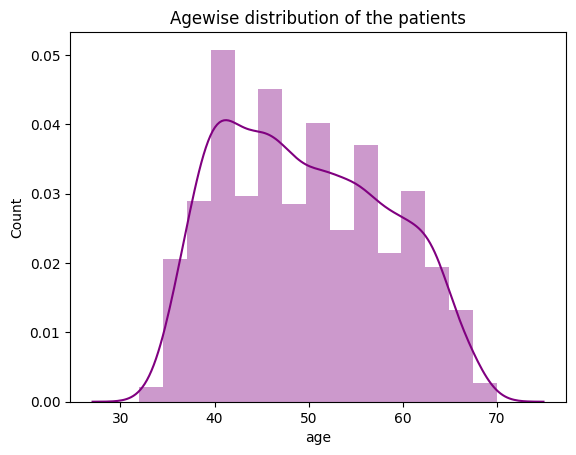

In [203]:
sns.distplot(heart_data['age'], bins=15, kde=True, color='purple')
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

/Users/sahilsingh/Desktop/AVI-TRAINING/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sahilsingh/Desktop/AVI-TRAINING/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sahilsingh/Desktop/AVI-TRAINING/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sahilsingh/Desktop/AVI-TRAINING/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: Futur

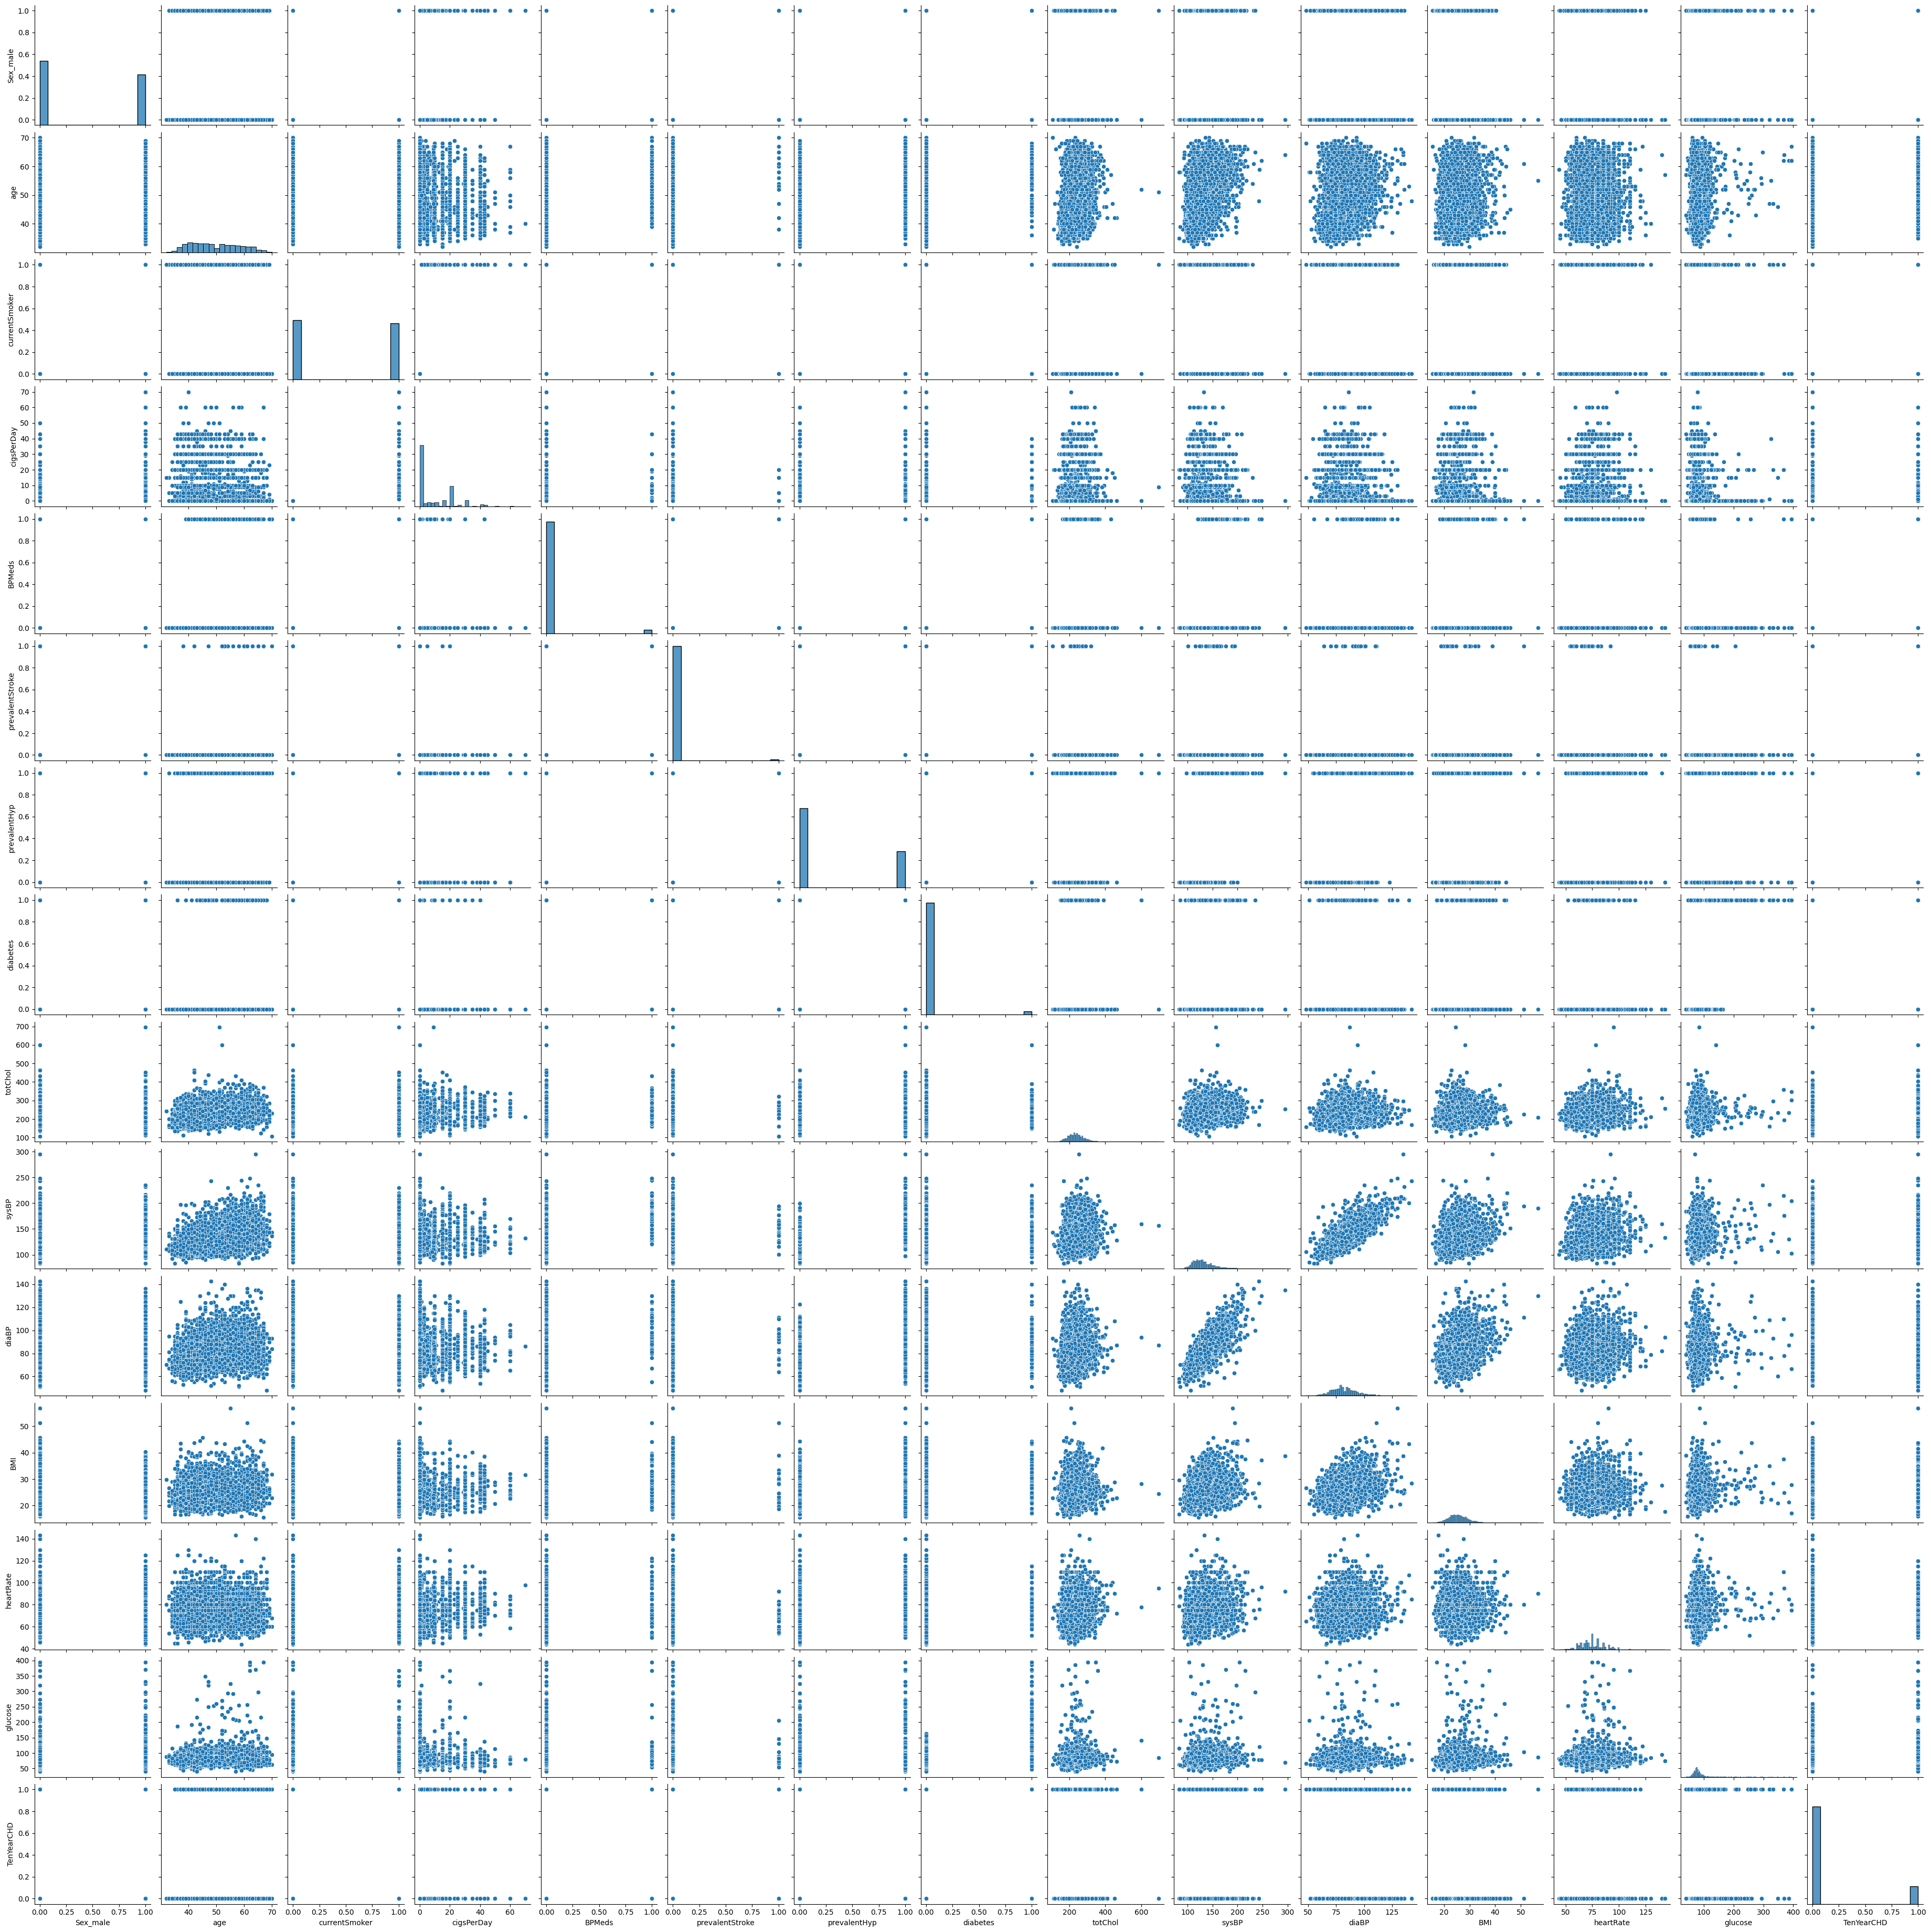

In [204]:
sns.pairplot(heart_data)

oversamplaming to remove data imbalance

In [205]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X =heart_data.drop(columns='TenYearCHD')
y = heart_data['TenYearCHD']
x_smote, y_smote = smote.fit_resample(X, y)
print(len(x_smote))
print(len(y_smote))

6470
6470


In [206]:
from sklearn import preprocessing


X = preprocessing.StandardScaler().fit(X).transform(X)

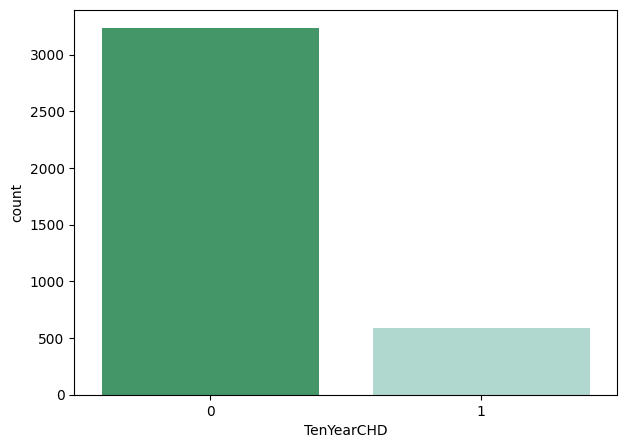

In [207]:
import seaborn as sns
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=heart_data,
             palette="BuGn_r")
plt.show()

Logistics regression model training 

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='sag', max_iter=1000))  
pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, solver='sag'))])

In [210]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, solver='sag'))])

In [211]:
y_pred = pipeline.predict(X_test)

In [212]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])

Accuracy checking 

In [190]:

from sklearn.metrics import classification_report,accuracy_score
y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("accuracy_train",accuracy_train)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       642
           1       0.72      0.65      0.68       652

    accuracy                           0.69      1294
   macro avg       0.69      0.69      0.69      1294
weighted avg       0.70      0.69      0.69      1294

accuracy_train 0.6802550231839258


/Users/sahilsingh/Desktop/AVI-TRAINING/.conda/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/Users/sahilsingh/Desktop/AVI-TRAINING/.conda/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


checking there is dataimbalanece or not

In [183]:
unique_values, counts = np.unique(y_pred, return_counts=True)
print("Prediction results:")
for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} times")


Prediction results:
0 occurs 674 times
1 occurs 620 times


calculating bias mse and varaince to check whether model is underfit overfit or generalized

In [184]:
from mlxtend.evaluate import bias_variance_decomp
mse, bias, variance = bias_variance_decomp(
    estimator=pipeline,
    X_train=X_train.values,  
    y_train=y_train.values,  
    X_test=X_test.values,    
    y_test=y_test.values,    
    random_seed=42,
    loss='mse'
)
print("Mean Squared Error (MSE):", mse)
print("Bias:", bias)
print("Variance:", variance)

Mean Squared Error (MSE): 0.31205564142194747
Bias: 0.289692542503864
Variance: 0.022363098918083458


so according to this values our model is generalized